# **Day 1** - Lecture 2
## Section 2. File handling and functions

### 1) Opening a text file

In [ ]:
# To open a text based file, we can use the open() function.
f_obj = open('../data/file_example1.txt')

# Let's print f_obj to see what it is.
print(f_obj)

<_io.TextIOWrapper name='file_example1.txt' mode='r' encoding='UTF-8'>


In [ ]:
# We can see the entire text by using the read() function.
#print(f_obj.read())

# Or we can print the text by lines using the readline() function.
print(f_obj.readline())
print(f_obj.readline())

xvals                 yvals

0.8641216311612758    0.23919054492654035



0.2131415384891292    0.9434728716309931



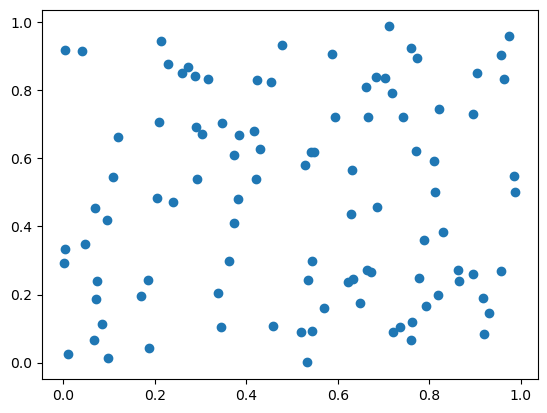

In [ ]:
# We can also iterate through the file object.
for i in f_obj:
    print(i)
    break # break here to avoid printing the entire file.

# As you can see, the f_obj.readline() moved the file-pointer. Let's reset it to the beginning of the line and extract xvals and yvals.
f_obj.seek(0)
xvals = []
yvals = []

f_obj.readline() # To remove the column names
for line in f_obj:
    x, y = line.split()
    xvals.append(float(x))
    yvals.append(float(y))

import matplotlib.pyplot as plt

plt.scatter(xvals, yvals)
plt.show()


50 50


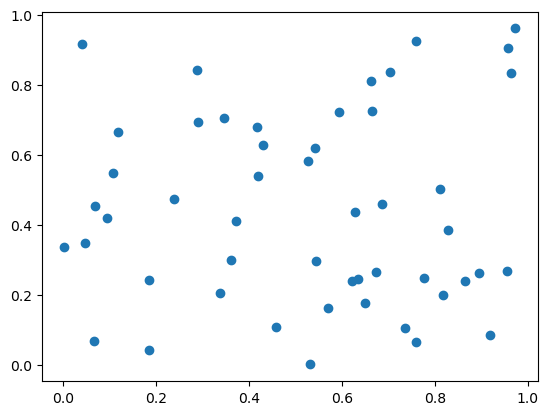

In [ ]:
# We will .
xvals_new = xvals[0::2]
yvals_new = yvals[0::2]

# To test the indexing.
#test_list = list(range(100))
#print(test_list[0::2])

plt.scatter(xvals_new, yvals_new)
print(len(xvals_new), len(yvals_new))

# Writing the x and y values
with open('../data/file_example1_after.txt', 'w') as f_obj:
    # Column names
    f_obj.write('xvals    yvals \n')
    for x, y in zip(xvals, yvals):
        # Forming a line of string
        new_line = str(x)+ '    ' +str(y) + '\n'
        f_obj.write(new_line)

### 2) Counting words from a text file

In [ ]:
# We will be using the file_example2.txt to count the each words.

# Define an empty dictionary
word_dict = {}

# Things need to be removed
removing_list = ['.', '-', ',', '!', '?', ':', ';']

# Opening a file
with open('../data/file_example2.txt') as f_obj:
    for line in f_obj:
        # Splitting a line of string into words
        splitted = line.split()
        for word in splitted:
            # Remove leading and trailing whitespaces
            word = word.strip()
            # Force the words to be lowercase
            word = word.lower()
            # Remove punctuation marks
            for remove in removing_list:
                while remove in word:
                    word = word.replace(remove,'')
            # Save it in the dictionary
            if word in word_dict.keys():
                word_dict[word] += 1
            else:
                word_dict[word] = 1

print(word_dict)

# Can you write a file with two columns named "Words" and "Counts?"

{'call': 1, 'me': 6, 'ishmael': 1, 'some': 8, 'years': 1, 'ago': 1, '': 13, 'never': 1, 'mind': 1, 'how': 2, 'long': 1, 'precisely': 1, 'having': 1, 'little': 2, 'or': 4, 'no': 2, 'money': 2, 'in': 23, 'my': 4, 'purse': 1, 'and': 31, 'nothing': 3, 'particular': 1, 'to': 21, 'interest': 1, 'on': 3, 'shore': 1, 'i': 9, 'thought': 1, 'would': 2, 'sail': 1, 'about': 2, 'a': 25, 'see': 4, 'the': 52, 'watery': 1, 'part': 1, 'of': 35, 'world': 1, 'it': 13, 'is': 17, 'way': 2, 'have': 1, 'driving': 1, 'off': 2, 'spleen': 1, 'regulating': 1, 'circulation': 1, 'whenever': 4, 'find': 2, 'myself': 2, 'growing': 1, 'grim': 1, 'mouth': 1, 'damp': 1, 'drizzly': 1, 'november': 1, 'soul': 2, 'involuntarily': 1, 'pausing': 1, 'before': 2, 'coffin': 1, 'warehouses': 2, 'bringing': 1, 'up': 3, 'rear': 1, 'every': 3, 'funeral': 1, 'meet': 1, 'especially': 1, 'hypos': 1, 'get': 4, 'such': 2, 'an': 2, 'upper': 1, 'hand': 1, 'that': 7, 'requires': 1, 'strong': 1, 'moral': 1, 'principle': 1, 'prevent': 1, 'fro

### 3) Functions

We will define a simple function that can do simple math.

In [ ]:
# Here is a function that can add two numbers

# To show that these variables outside of the function won't affect the variables inside.
a = 3
b = 5

def add(a, b):
    result = a + b
    return result

print(a + b)
print(add(1,2))

def calculator(a, operator, b):
    operations = ['+', '-', '*', '/', '^']
    if operator == '+':
        result = a + b
    elif operator == '-':
        result = a - b
    elif operator == '*':
        result = a * b
    elif operator == '/':
        result = a / b
    elif operator == '^':
        result = a ** b
    else:
        raise RuntimeError('Check your operator')
    return result

print("Testing the calculator function")
print(calculator(3,'+',5))
print(calculator(3,'-',5))
print(calculator(3,'*',5))
print(calculator(3,'^',5))
# To raise the error
#print(calculator(3,'&',5))

8
3
Testing the calculator function
8
-2
15
243


Now, we will define a function that can parse through a complicated text file.

In [ ]:
# We will extract important information from a complicated text file.
# It is a quantum calculation output file from a software package.

def parse_output(input_name, output_name):
    # Defining an empty list that will be returned
    energies = []

    # Open a file
    with open(input_name) as f_obj:
        # Iterate through the lines
        for line in f_obj:
            # If desired string is detected,
            if 'FINAL ENERGY' in line:
                # Save the number.
                energies.append(float(line.split()[2]))
    # Save the extracted values
    with open(output_name, 'w') as f_obj:
        # %12 holds 12 spaces for the 's' type (string) data
        f_obj.write("%12s %12s \n" %("Iteration", "Energy"))
        for i, energy in enumerate(energies):
            line = '%12s %12.5f \n' %('Iteration %i' %i, energy)
            f_obj.write(line)
    return energies

energies = parse_output('../data/file_example3.out','../data/energies.txt')